# CPSC 4970 AI + ML: Module 1


In [188]:
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import IPython
from IPython.core.display import display
import sklearn
import mglearn

## Loading data sets

- scikit-learn datasets:
  https://scikit-learn.org/stable/datasets.html#datasets
- Seaborn datasets:
  https://seaborn.pydata.org/generated/seaborn.load_dataset.html
- Pandas functions for reading from files/urls:
  https://pandas.pydata.org/docs/user_guide/io.html
- UCI machine learning data repository:
  https://archive.ics.uci.edu/ml/index.php
- Kaggle:
  https://kaggle.com


In [189]:
db = sklearn.datasets.load_diabetes(as_frame=True)['frame']
#print(db)
pen = sns.load_dataset('penguins')
#print(type(pen))
vac = pd.read_csv('data/vaccinations.csv')
print(vac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             32941 non-null  object 
 1   iso_code                             32941 non-null  object 
 2   date                                 32941 non-null  object 
 3   total_vaccinations                   19348 non-null  object 
 4   people_vaccinated                    18497 non-null  float64
 5   people_fully_vaccinated              15498 non-null  float64
 6   daily_vaccinations_raw               16340 non-null  float64
 7   daily_vaccinations                   32690 non-null  object 
 8   total_vaccinations_per_hundred       19347 non-null  float64
 9   people_vaccinated_per_hundred        18497 non-null  float64
 10  people_fully_vaccinated_per_hundred  15498 non-null  float64
 11  daily_vaccinations_per_milli

## Splitting training and testing data

scikit-learn docs:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [190]:
fake_data = np.array([1, 10, 2, 3, 15, 1, -1, -3, 18, 12, 22, 15]).reshape(4, 3)
display(fake_data)
train, test = sklearn.model_selection.train_test_split(db, test_size=0.33)
display(train)
display(test.head(5))

array([[ 1, 10,  2],
       [ 3, 15,  1],
       [-1, -3, 18],
       [12, 22, 15]])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
144,0.030811,0.050680,0.046607,-0.015999,0.020446,0.050669,-0.058127,0.071210,0.006209,0.007207,174.0
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920,134.0
108,0.019913,0.050680,0.045529,0.029906,-0.062111,-0.055802,-0.072854,0.026929,0.045601,0.040343,232.0
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025952,-0.001078,83.0
322,0.023546,0.050680,0.061696,0.062039,0.024574,-0.036073,-0.091262,0.155345,0.133396,0.081764,242.0
...,...,...,...,...,...,...,...,...,...,...,...
277,-0.034575,-0.044642,-0.059019,0.001215,-0.053855,-0.078035,0.067048,-0.076395,-0.021394,0.015491,64.0
80,0.070769,-0.044642,0.012117,0.042530,0.071357,0.053487,0.052322,-0.002592,0.025393,-0.005220,143.0
251,-0.052738,0.050680,0.098342,0.087287,0.060349,0.048790,-0.058127,0.108111,0.084495,0.040343,243.0
262,-0.016412,0.050680,0.127443,0.097616,0.016318,0.017475,-0.021311,0.034309,0.034864,0.003064,308.0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
286,-0.038207,-0.044642,-0.054707,-0.077971,-0.033216,-0.086490,0.140681,-0.076395,-0.019197,-0.005220,60.0
395,-0.060003,-0.044642,0.001339,-0.029771,-0.007073,-0.021669,0.011824,-0.002592,0.031815,-0.054925,258.0
368,-0.016412,0.050680,0.002417,0.014987,0.021822,-0.010082,-0.024993,0.034309,0.085533,0.081764,123.0
137,0.005383,-0.044642,0.049840,0.097616,-0.015328,-0.016345,-0.006584,-0.002592,0.017037,-0.013504,280.0
147,-0.056370,-0.044642,0.092953,-0.019442,0.014942,0.023425,-0.028674,0.025453,0.026056,0.040343,128.0


## Separate the feature matrix and target vector

- Pandas User Guide especially "10 minutes to pandas":
  https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

In [191]:
X_train = train[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
display(X_train)
X_test = test[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
# could use "iloc"
y_train = train['target']
y_test = test['target']
display(y_train)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
144,0.030811,0.050680,0.046607,-0.015999,0.020446,0.050669,-0.058127,0.071210,0.006209,0.007207
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059473,-0.083920
108,0.019913,0.050680,0.045529,0.029906,-0.062111,-0.055802,-0.072854,0.026929,0.045601,0.040343
299,0.038076,0.050680,-0.013751,-0.015999,-0.035968,-0.021982,-0.013948,-0.002592,-0.025952,-0.001078
322,0.023546,0.050680,0.061696,0.062039,0.024574,-0.036073,-0.091262,0.155345,0.133396,0.081764
...,...,...,...,...,...,...,...,...,...,...
277,-0.034575,-0.044642,-0.059019,0.001215,-0.053855,-0.078035,0.067048,-0.076395,-0.021394,0.015491
80,0.070769,-0.044642,0.012117,0.042530,0.071357,0.053487,0.052322,-0.002592,0.025393,-0.005220
251,-0.052738,0.050680,0.098342,0.087287,0.060349,0.048790,-0.058127,0.108111,0.084495,0.040343
262,-0.016412,0.050680,0.127443,0.097616,0.016318,0.017475,-0.021311,0.034309,0.034864,0.003064


144    174.0
106    134.0
108    232.0
299     83.0
322    242.0
       ...  
277     64.0
80     143.0
251    243.0
262    308.0
373    168.0
Name: target, Length: 296, dtype: float64

## Intro to data visualization

Tools:
- Use matplotlib directly:
 - https://matplotlib.org/stable/tutorials/introductory/pyplot.html (tutorial)
 - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot (reference)
- Use pandas visualization tools: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html -- not used in this course
- Use Seaborn:
 - https://seaborn.pydata.org/
 - https://seaborn.pydata.org/tutorial.html (tutorial)
 - https://seaborn.pydata.org/tutorial/function_overview.html (part of tutorial)
 - https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial (part of tutorial)
 - https://seaborn.pydata.org/tutorial/axis_grids.html (part of tutorial)

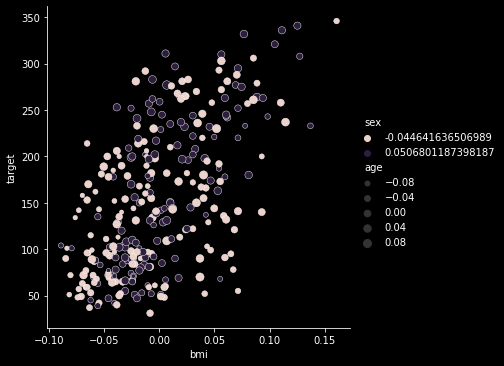

In [192]:
sns.relplot(x="bmi", y="target", hue='sex', size='age', data=train)

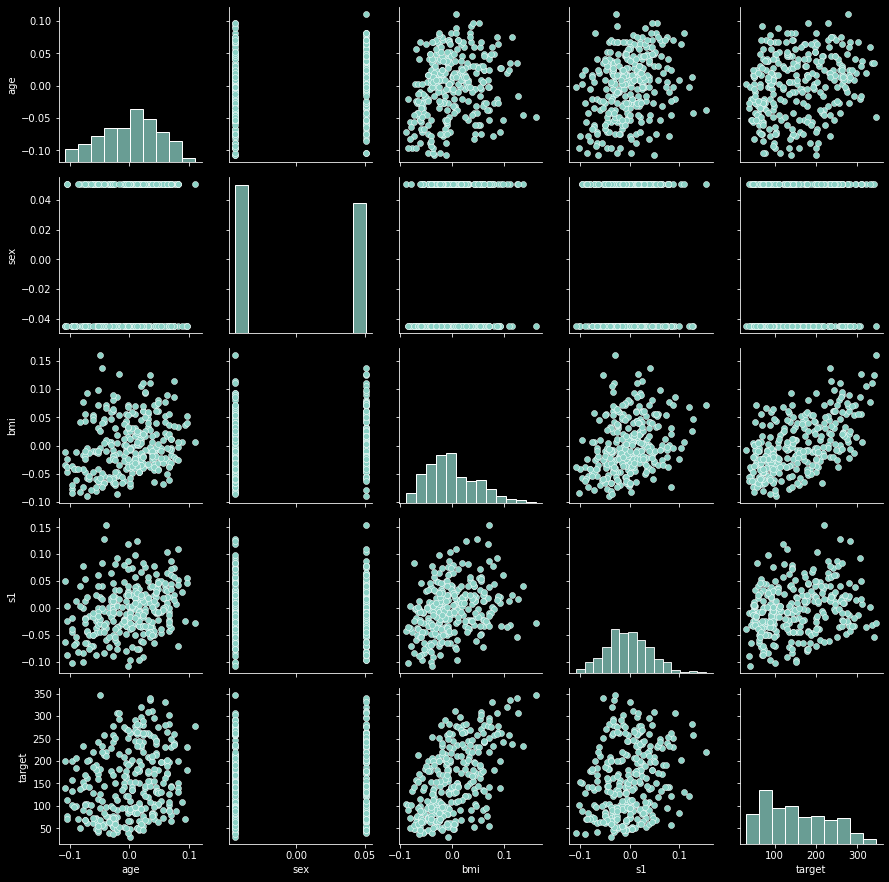

In [193]:
g = sns.PairGrid(train[['age', 'sex', 'bmi', 's1', 'target']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

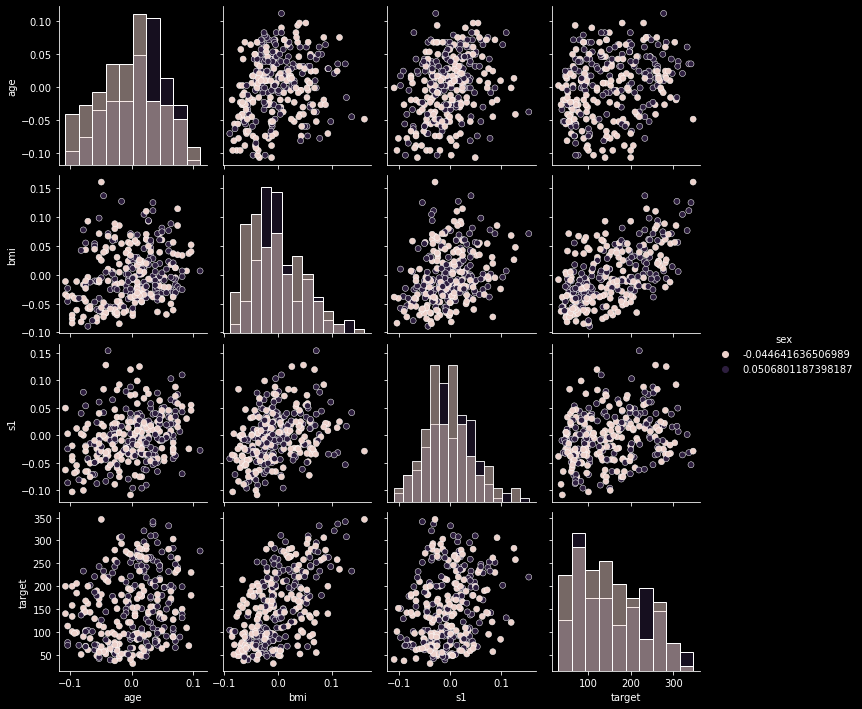

In [194]:
sns.pairplot(train[['age', 'sex', 'bmi', 's1', 'target']], hue='sex', diag_kind='hist')

## Univariate linear model

- Scikit-learn LinearRegression
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    and
    https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

Santity check:

In [195]:
synth = pd.read_csv('data/synthetic_linear_1var.csv')
X = synth[['x']]
y = synth['y']
synth_lr = sklearn.linear_model.LinearRegression().fit(X, y)
print("intercept: ", synth_lr.intercept_)
print("coeff: ", synth_lr.coef_)

intercept:  -0.11363636363637397
coeff:  [5.20272727]


Regression of BMI vs target

intercept:  153.99210871905265
coeff:  [959.94180079]


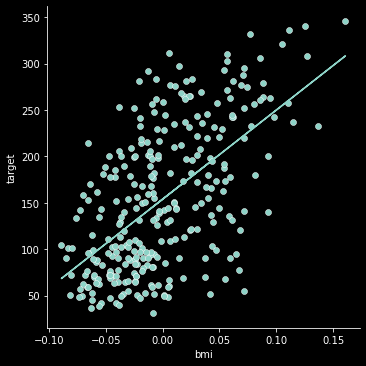

In [196]:
lr = sklearn.linear_model.LinearRegression().fit(X_train[['bmi']], y_train)
print("intercept: ", lr.intercept_)
print("coeff: ", lr.coef_)

sns.relplot(x='bmi', y='target', data=train)
p = lr.predict(X_train[['bmi']])
plt.plot(X_train[['bmi']], p)

## Metrics

- Scikit-learn's metrics module:
  https://scikit-learn.org/stable/modules/model_evaluation.html (especially "regression metrics" section)
  and
  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

First our synthetic data

In [197]:
p = synth_lr.predict(X)
mse = sklearn.metrics.mean_squared_error(synth['y'], p)
print("MSE: ", mse)
r2 = sklearn.metrics.r2_score(synth['y'], p)
print("R2: ", r2)

MSE:  2.510834710743799
R2:  0.990809352702975


Now for diabetes data set

In [198]:
p = lr.predict(X_train[['bmi']])
mse = sklearn.metrics.mean_squared_error(y_train, p)
print("MSE: ", mse)
r2 = sklearn.metrics.r2_score(y_train, p)
print("R2: ", r2)
print((max(y_train)-min(y_train))**2/len(y_train))

MSE:  3997.0422001276793
R2:  0.3443891638584792
335.2195945945946
